In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [53]:
mobile_data=pd.read_csv('mobile_ads.csv')
mobile_data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [54]:
mobile_data.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [55]:
mobile_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [56]:
from sklearn.model_selection import train_test_split
x=mobile_data.drop(['User ID','Gender','Purchased'],axis=1).to_numpy() 
y=mobile_data['Purchased'].to_numpy()
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [57]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [58]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=200,criterion='entropy',random_state=2)
rf.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=200, random_state=2)

In [59]:
y_pred=rf.predict(x_test)
rf.score(x_test,y_test)

0.875

In [60]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[44,  4],
       [ 6, 26]], dtype=int64)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


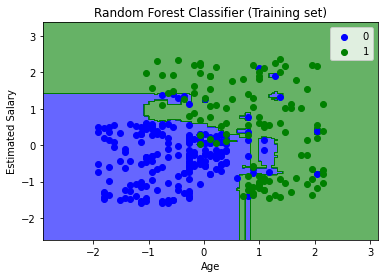

In [61]:
from matplotlib.colors import ListedColormap
X_Set, Y_Set =x_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_Set[:,0].min() - 1, stop = X_Set[:,0].max() + 1, step = 0.01),
                     np.arange(start = X_Set[:,1].min() - 1, stop = X_Set[:,1].max() + 1, step = 0.01))

Y=rf.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape)
plt.contourf(X1, X2, Y ,alpha = 0.6, cmap = ListedColormap(('blue', 'green')))
for i, j in enumerate(np.unique(Y_Set)):
    plt.scatter(X_Set[Y_Set == j, 0], X_Set[Y_Set == j, 1],c = ListedColormap(('blue','green'))(i), label = j)

    
plt.title('Random Forest Classifier (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


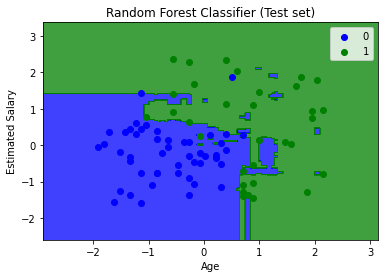

In [70]:
from matplotlib.colors import ListedColormap
X_Set, Y_Set = x_test, y_test
X1, X2 = np.meshgrid(np.arange(X_Set[:, 0].min() - 1,X_Set[:, 0].max() + 1, 0.01),
                     np.arange(X_Set[:, 1].min() - 1,X_Set[:, 1].max() + 1, 0.01))
plt.contourf(X1, X2, rf.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('blue', 'green')))
for i, j in enumerate(np.unique(Y_Set)):
    plt.scatter(X_Set[Y_Set == j, 0], X_Set[Y_Set == j, 1],
                c = ListedColormap(('blue', 'green'))(i), label = j)
plt.title('Random Forest Classifier (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()